In [1]:
import pandas as pd
import networkx as nx
from itertools import combinations

In [20]:
df = pd.read_csv("/home/ada/Documents/DTA/Thesis/Data/Clustered_final/Processed/Processed_Narcos.csv")
df['Speaker'] = df['Speaker'].astype(str)
df['Speaker'] = df['Speaker'].apply(lambda x: "SPEAKER_" + x if len(x) == 2 else "SPEAKER_0" + x)

In [21]:
def name_all(df):
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_00", "Bubbles")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_01", "Cedric")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_02", "Proposition_Joe")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_03", "D'Angelo/Preston/Malik")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_04", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_05", "various_songs")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_06", "Ervin")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_07", "Stinger")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_08", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_09", "Lester")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_10", "Rhonda/Marla")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_11", "Moreland")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_12", "William_Rawls")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_13", "Ellis_Carver/Ziggy")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_14", "Herc")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_15", "Frank_Sobotka")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_16", "Omar")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_17", "Rhonda")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_18", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_19", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_20", "D'Angelo")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_21", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_22", "Roland")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_23", "Kima/Marla")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_24", "McNulty")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_25", "Maurice")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_26", "Avon/Wee-Bey")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_27", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_28", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_29", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_30", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_31", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_32", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_33", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_34", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_35", "")
  return df


df2 = name_all(df)
speaker_list = df2['Speaker'].tolist()

In [22]:
G = nx.Graph()

si, ei = 0, 2 #start index, end index
while ei < len(speaker_list):
    interaction = []
    for character in set(speaker_list[si : ei]):
        if ' ' in character:
            interaction.extend(character.split())
        else:
            interaction.append(character)
    interaction = set(interaction)
    if len(interaction) > 1:
        for sp1, sp2 in combinations(interaction, 2):
            if G.has_edge(sp1, sp2):
                G[sp1][sp2]['weight'] += 1
            else:
                G.add_edge(sp1, sp2, weight=1)
    si += 1
    ei += 1

In [23]:
print(G.nodes)
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
nx.write_gexf(G, '/home/ada/Documents/DTA/Thesis/Data/Networks/The_Wire.gexf')
print('# interactions:', G.size(weight='weight'))

['Frank_Sobotka', 'Lester', 'SPEAKER_04', 'Kima/Marla', 'Cedric', 'SPEAKER_19', "D'Angelo", 'various_songs', 'Maurice', 'Omar', 'Bubbles', 'William_Rawls', "D'Angelo/Preston/Malik", 'Proposition_Joe', 'Ellis_Carver/Ziggy', 'SPEAKER_18', 'Roland', 'SPEAKER_08', 'McNulty', 'Herc', 'SPEAKER_21', 'Ervin', 'Rhonda', 'Stinger', 'Moreland', 'Rhonda/Marla']
# nodes = 26, # edges = 325
# interactions: 10185.0


In [24]:
from copy import deepcopy

print('Before:')
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
print('# interactions:', G.size(weight='weight'))


Before:
# nodes = 26, # edges = 325
# interactions: 10185.0


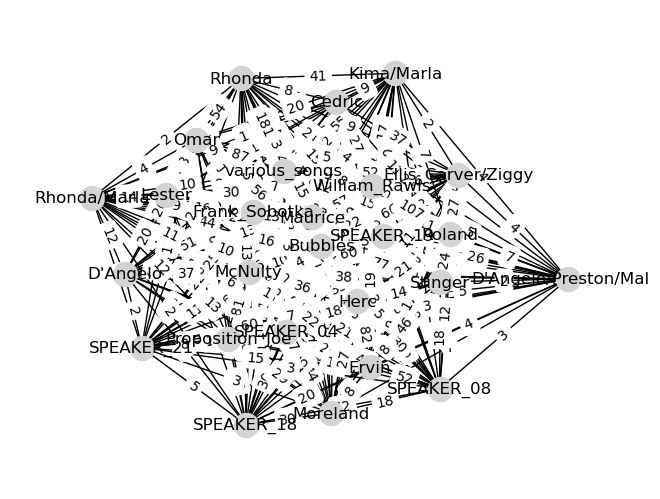

In [25]:
import matplotlib.pyplot as plt
from matplotlib.figure import _AxesStack

pos = nx.spring_layout(G, scale=2)
nx.draw(G, pos, node_color='lightgrey')
nx.draw_networkx_labels(G, pos);
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'weight'));

# take care of margins
plot_margin = 0.25
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin, x1 + plot_margin,
          y0 - plot_margin, y1 + plot_margin))
plt.axis('off');

In [26]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,Frank_Sobotka,Lester,41
1,Frank_Sobotka,SPEAKER_04,43
2,Frank_Sobotka,Bubbles,132
3,Frank_Sobotka,Maurice,87
4,Frank_Sobotka,McNulty,85
...,...,...,...
320,Rhonda,Stinger,8
321,Rhonda,Moreland,3
322,Stinger,Rhonda/Marla,16
323,Stinger,Moreland,8


In [27]:
unweighted = G.degree()
weighted = G.degree(weight='weight')
bcent = nx.betweenness_centrality(G)
bcent

print(weighted)
print(unweighted)

[('Frank_Sobotka', 1324), ('Lester', 693), ('SPEAKER_04', 702), ('Kima/Marla', 484), ('Cedric', 484), ('SPEAKER_19', 1091), ("D'Angelo", 466), ('various_songs', 1266), ('Maurice', 1662), ('Omar', 796), ('Bubbles', 2814), ('William_Rawls', 882), ("D'Angelo/Preston/Malik", 268), ('Proposition_Joe', 692), ('Ellis_Carver/Ziggy', 550), ('SPEAKER_18', 454), ('Roland', 618), ('SPEAKER_08', 464), ('McNulty', 860), ('Herc', 780), ('SPEAKER_21', 372), ('Ervin', 660), ('Rhonda', 588), ('Stinger', 638), ('Moreland', 462), ('Rhonda/Marla', 300)]
[('Frank_Sobotka', 25), ('Lester', 25), ('SPEAKER_04', 25), ('Kima/Marla', 25), ('Cedric', 25), ('SPEAKER_19', 25), ("D'Angelo", 25), ('various_songs', 25), ('Maurice', 25), ('Omar', 25), ('Bubbles', 25), ('William_Rawls', 25), ("D'Angelo/Preston/Malik", 25), ('Proposition_Joe', 25), ('Ellis_Carver/Ziggy', 25), ('SPEAKER_18', 25), ('Roland', 25), ('SPEAKER_08', 25), ('McNulty', 25), ('Herc', 25), ('SPEAKER_21', 25), ('Ervin', 25), ('Rhonda', 25), ('Stinger'

In [28]:
pairs = dict(nx.all_pairs_shortest_path_length(G))
pairs

{'Frank_Sobotka': {'Frank_Sobotka': 0,
  'Bubbles': 1,
  'Proposition_Joe': 1,
  'SPEAKER_19': 1,
  'various_songs': 1,
  'Moreland': 1,
  'William_Rawls': 1,
  'SPEAKER_18': 1,
  'Kima/Marla': 1,
  'Roland': 1,
  'Lester': 1,
  'Cedric': 1,
  'Omar': 1,
  'Rhonda': 1,
  'Stinger': 1,
  'Ellis_Carver/Ziggy': 1,
  'Ervin': 1,
  'Herc': 1,
  'SPEAKER_21': 1,
  'McNulty': 1,
  "D'Angelo": 1,
  "D'Angelo/Preston/Malik": 1,
  'Rhonda/Marla': 1,
  'SPEAKER_04': 1,
  'SPEAKER_08': 1,
  'Maurice': 1},
 'Lester': {'Lester': 0,
  'Bubbles': 1,
  'Proposition_Joe': 1,
  'SPEAKER_19': 1,
  'various_songs': 1,
  'SPEAKER_18': 1,
  'William_Rawls': 1,
  'Moreland': 1,
  'Kima/Marla': 1,
  'Roland': 1,
  'Cedric': 1,
  'Omar': 1,
  'Rhonda': 1,
  'Stinger': 1,
  'Ellis_Carver/Ziggy': 1,
  'Ervin': 1,
  'Herc': 1,
  'SPEAKER_21': 1,
  'McNulty': 1,
  "D'Angelo": 1,
  "D'Angelo/Preston/Malik": 1,
  'Rhonda/Marla': 1,
  'SPEAKER_04': 1,
  'Frank_Sobotka': 1,
  'SPEAKER_08': 1,
  'Maurice': 1},
 'SPEAKER

In [29]:
import pandas as pd
data = []
for c in sorted(pairs.keys()):
    data.append([pairs[c][d] for d in sorted(pairs.keys())])
pd.DataFrame(data, index=sorted(pairs.keys()), columns=sorted(pairs.keys()))

,Bubbles,Cedric,D'Angelo,D'Angelo/Preston/Malik,Ellis_Carver/Ziggy,Ervin,Frank_Sobotka,Herc,Kima/Marla,Lester,...,Rhonda/Marla,Roland,SPEAKER_04,SPEAKER_08,SPEAKER_18,SPEAKER_19,SPEAKER_21,Stinger,William_Rawls,various_songs
Bubbles,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Cedric,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
D'Angelo,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
D'Angelo/Preston/Malik,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ellis_Carver/Ziggy,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ervin,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Frank_Sobotka,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Herc,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Kima/Marla,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Lester,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [30]:
weighted = nx.betweenness_centrality(G)

data = [(c, weighted[c]) for c in G.nodes()]
pd.DataFrame(data, columns=('character', 'betweenness centrality'))

,character,betweenness centrality
0,Frank_Sobotka,0.0
1,Lester,0.0
2,SPEAKER_04,0.0
3,Kima/Marla,0.0
4,Cedric,0.0
5,SPEAKER_19,0.0
6,D'Angelo,0.0
7,various_songs,0.0
8,Maurice,0.0
9,Omar,0.0
